# Time Series #2

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/pandas/main/seoul_pm.csv')
df.head()

,(년-월-일:시),PM10등급,PM10,PM2.5등급,PM2.5,오존등급,오존,이산화질소등급,이산화질소,일산화탄소등급,일산화탄소,아황산가스등급,아황산가스
0,2021-05-15:15,보통,47.0,보통,19.0,좋음,0.017,좋음,0.023,좋음,0.4,좋음,0.003
1,2021-05-15:14,보통,43.0,보통,20.0,좋음,0.024,좋음,0.019,좋음,0.3,좋음,0.003
2,2021-05-15:13,보통,34.0,보통,24.0,보통,0.035,좋음,0.017,좋음,0.4,좋음,0.004
3,2021-05-15:12,보통,41.0,보통,27.0,보통,0.037,좋음,0.020,좋음,0.4,좋음,0.004
4,2021-05-15:11,보통,51.0,보통,34.0,보통,0.033,좋음,0.023,좋음,0.4,좋음,0.005


### 1. 년-월-일:시 컬럼을 pandas에서 인식할 수 있는 datetime 형태로 변경하라. 서울시의 제공데이터의 경우 0시가 24시로 표현된다

In [3]:
df['(년-월-일:시)'][0].split(':')

['2021-05-15', '15']

In [4]:
# df['(년-월-일:시)']

def changeDate(x):
    import datetime
    date = x.split(':')[0]
    hour = x.split(':')[1]
    
    if hour == '24':
        hour = '00:00:00'
        finalDate = pd.to_datetime(date + " " + hour) + datetime.timedelta(days=1)
    else:
        hour = hour + ':00:00'
        finalDate = pd.to_datetime(date + " " + hour)
    return finalDate

df['(년-월-일:시)'] = df['(년-월-일:시)'].apply(changeDate)
df['(년-월-일:시)'].head()

0   2021-05-15 15:00:00
1   2021-05-15 14:00:00
2   2021-05-15 13:00:00
3   2021-05-15 12:00:00
4   2021-05-15 11:00:00
Name: (년-월-일:시), dtype: datetime64[ns]

### 2. 일자별 영어요일 이름을 dayName 컬럼에 저장하라

In [5]:
df['dayName'] = df['(년-월-일:시)'].dt.day_name()
df['dayName'].head()

0    Saturday
1    Saturday
2    Saturday
3    Saturday
4    Saturday
Name: dayName, dtype: object

In [6]:
def changeDayName(x):
    dayName = x.day_name()
    return dayName

df['dayName'] = df['(년-월-일:시)'].apply(changeDayName)
df['dayName'].head()

0    Saturday
1    Saturday
2    Saturday
3    Saturday
4    Saturday
Name: dayName, dtype: object

### 3. 요일별 각 PM10등급의 빈도수를 파악하라

In [7]:
df.groupby(['dayName', 'PM10등급'], as_index=False).size()

,dayName,PM10등급,size
0,Friday,나쁨,31
1,Friday,매우나쁨,17
2,Friday,보통,120
3,Friday,좋음,21
4,Monday,나쁨,1
5,Monday,매우나쁨,21
6,Monday,보통,83
7,Monday,좋음,63
8,Saturday,나쁨,31
9,Saturday,매우나쁨,27


In [8]:
Ans = df.groupby(['dayName','PM10등급'],as_index=False).size()
Ans2 = Ans.pivot(index='dayName',columns='PM10등급',values='size').fillna(0)
Ans2

PM10등급,나쁨,매우나쁨,보통,좋음
dayName,,,,
Friday,31.0,17.0,120.0,21.0
Monday,1.0,21.0,83.0,63.0
Saturday,31.0,27.0,71.0,54.0
Sunday,2.0,1.0,67.0,98.0
Thursday,41.0,0.0,144.0,5.0
Tuesday,13.0,10.0,71.0,74.0
Wednesday,26.0,0.0,95.0,46.0


### 4. 시간이 연속적으로 존재하며 결측치가 없는지 확인하라

In [9]:
# 시간을 차분했을 경우 첫 값은 nan, 이후 모든 차분값이 동일하면 연속이라 판단한다.
check = len(df['(년-월-일:시)'].diff().unique())
if check == 2:
    Ans = True
else:
    Ans = False
Ans

True

### 5. 오전 10시와 오후 10시(22시)의 PM10의 평균값을 각각 구하여라

In [10]:
df.groupby(df['(년-월-일:시)'].dt.hour)['PM10'].mean()[[10,22]]

(년-월-일:시)
10    70.384615
22    69.941176
Name: PM10, dtype: float64

In [11]:
Ans = df.groupby(df['(년-월-일:시)'].dt.hour).mean().iloc[[10,22],[0]]
Ans

,PM10
(년-월-일:시),
10,70.384615
22,69.941176


### 6. 날짜 컬럼을 index로 만들어라

In [12]:
df = df.set_index('(년-월-일:시)')
df

,PM10등급,PM10,PM2.5등급,PM2.5,오존등급,오존,이산화질소등급,이산화질소,일산화탄소등급,일산화탄소,아황산가스등급,아황산가스,dayName
(년-월-일:시),,,,,,,,,,,,,
2021-05-15 15:00:00,보통,47.0,보통,19.0,좋음,0.017,좋음,0.023,좋음,0.4,좋음,0.003,Saturday
2021-05-15 14:00:00,보통,43.0,보통,20.0,좋음,0.024,좋음,0.019,좋음,0.3,좋음,0.003,Saturday
2021-05-15 13:00:00,보통,34.0,보통,24.0,보통,0.035,좋음,0.017,좋음,0.4,좋음,0.004,Saturday
2021-05-15 12:00:00,보통,41.0,보통,27.0,보통,0.037,좋음,0.020,좋음,0.4,좋음,0.004,Saturday
2021-05-15 11:00:00,보통,51.0,보통,34.0,보통,0.033,좋음,0.023,좋음,0.4,좋음,0.005,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-25 05:00:00,보통,39.0,보통,18.0,좋음,0.026,좋음,0.025,좋음,0.4,좋음,0.003,Thursday
2021-03-25 04:00:00,보통,34.0,좋음,15.0,좋음,0.017,보통,0.033,좋음,0.4,좋음,0.002,Thursday
2021-03-25 03:00:00,보통,35.0,좋음,13.0,좋음,0.029,좋음,0.025,좋음,0.4,좋음,0.003,Thursday


### 7. 데이터를 주단위로 뽑아서 최소,최대 평균, 표준표차를 구하여라

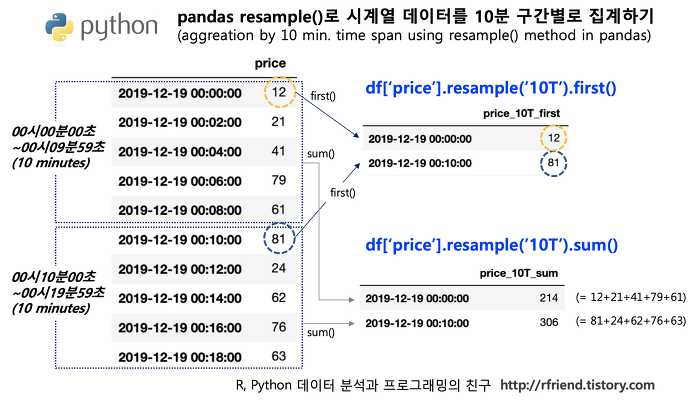

In [13]:
Ans = df.resample('W').agg(['min','max','mean','std'])
Ans

PM10                                 PM2.5                    \
             min     max        mean         std   min    max       mean   
(년-월-일:시)                                                                  
2021-03-28   6.0   160.0   72.747368   43.345462   4.0  113.0  44.705263   
2021-04-04   3.0   598.0   97.148810  129.911976   1.0  120.0  23.168675   
2021-04-11  17.0   102.0   41.059524   16.325911   7.0   70.0  21.761905   
2021-04-18   3.0   367.0   48.180723   43.254468   2.0   38.0  17.066265   
2021-04-25  17.0   126.0   55.119048   26.659936   7.0   61.0  26.392857   
2021-05-02   3.0    97.0   40.612121   24.813103   1.0   43.0  16.644578   
2021-05-09   8.0  1024.0  161.660714  239.679148   3.0  172.0  34.738095   
2021-05-16  16.0   111.0   40.014815   21.876855   7.0   76.0  21.577778   

                          오존         ...     이산화질소           일산화탄소       \
                  std    min    max  ...      mean       std   min  max   
(년-월-일:시)                            ...                                  
2021-03-28  29.551928  0.002  0.085  ...  0.044579  0.023722   0.3  1.4   
2021-04-04  22.399578  0.003  0.055  ...  0.027929  0.014978   0.3  0.9   
2021-04-11  11.479343  0.009  0.070  ...  0.022583  0.009562   0.3  0.7   
2021-04-18   7.867952  0.002  0.070  ...  0.023753  0.013553   0.3  0.6   
2021-04-25  13.094788  0.006  0.090  ...  0.028571  0.014640   0.3  0.8   
2021-05-02   8.850965  0.003  0.064  ...  0.020428  0.011676   0.3  0.6   
2021-05-09  39.788248  0.002  0.073  ...  0.024187  0.012371   0.3  1.0   
2021-05-16  15.622633  0.004  0.123  ...  0.030793  0.009503   0.3  0.8   

                                아황산가스                             
                mean       std    min    max      mean       std  
(년-월-일:시)                                                         
2021-03-28  0.611579  0.232408  0.002  0.006  0.003274  0.000961  
2021-04-04  0.445833  0.135741  0.002  0.004  0.002732  0.000541  
2021-04-11  0.389286  0.087573  0.002  0.004  0.002744  0.000569  
2021-04-18  0.386747  0.084954  0.002  0.004  0.002464  0.000579  
2021-04-25  0.457143  0.122142  0.001  0.011  0.003631  0.001763  
2021-05-02  0.392771  0.092485  0.001  0.006  0.002524  0.000768  
2021-05-09  0.419277  0.103230  0.002  0.004  0.002771  0.000579  
2021-05-16  0.440741  0.094075  0.001  0.006  0.002459  0.001696  

[8 rows x 24 columns]